In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import time
import warnings
warnings.filterwarnings('ignore')

In [54]:
df_crime_reports = pd.read_csv('df_crime_reports.csv',dtype={'zip_code': 'str'})

In [55]:
df_crime_reports.head()

,crime_type,location_type,address,zip_code,council_district,sector,district,latitude,longitude,location,clearance_status,clearance_date,occurred_date,reported_date,month,year,hour
0,ASSAULT BY CONTACT FAM/DATING,RESIDENCE / HOME,107 W CROSLIN ST,78752,4.0,ID,8,30.337487,-97.709976,"{'latitude': '30.33748689', 'longitude': '-97....",NaN,NaN,2023-02-18 23:55:00,2023-02-18 23:55:00,February,2023,23
1,POSS CONTROLLED SUB/NARCOTIC,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,5100 DUVAL ST,78751,9.0,ID,6,30.314296,-97.719965,"{'latitude': '30.3142963', 'longitude': '-97.7...",C,2023-02-19T00:00:00.000,2023-02-18 23:27:00,2023-02-18 23:27:00,February,2023,23
2,THEFT,RESIDENCE / HOME,4611 N IH 35 SVRD NB,78722,9.0,BA,4,30.304672,-97.712808,"{'latitude': '30.30467246', 'longitude': '-97....",NaN,NaN,2023-02-18 23:24:00,2023-02-18 23:24:00,February,2023,23
3,TERRORISTIC THREAT,PARKING /DROP LOT/ GARAGE,7622 N IH 35 SVRD SB,78752,4.0,ID,8,30.338908,-97.702001,"{'latitude': '30.33890768', 'longitude': '-97....",NaN,NaN,2023-02-18 23:04:00,2023-02-18 23:04:00,February,2023,23
4,DOC DISCHARGE GUN - PUB PLACE,RESIDENCE / HOME,6118 FAIRWAY ST,78741,3.0,HE,3,30.229004,-97.703101,"{'latitude': '30.2290038', 'longitude': '-97.7...",NaN,NaN,2023-02-18 23:03:00,2023-02-18 23:48:00,February,2023,23


In [56]:
df_crime_reports.dtypes

crime_type           object
location_type        object
address              object
zip_code             object
council_district    float64
sector               object
district             object
latitude            float64
longitude           float64
location             object
clearance_status     object
clearance_date       object
occurred_date        object
reported_date        object
month                object
year                  int64
hour                  int64
dtype: object

In [57]:
df_crime_reports['year'].value_counts()

2008    143493
2009    141172
2007    136734
2010    136504
2006    129069
2011    127917
2012    127400
2013    122941
2014    114723
2015    110656
2016    107056
2017    103835
2019    103068
2020     98824
2018     97928
2021     91544
2022     87294
2023     10362
2005      9480
Name: year, dtype: int64

### Crime rate is been on the decline since 2008. 

### Top 25 crime types

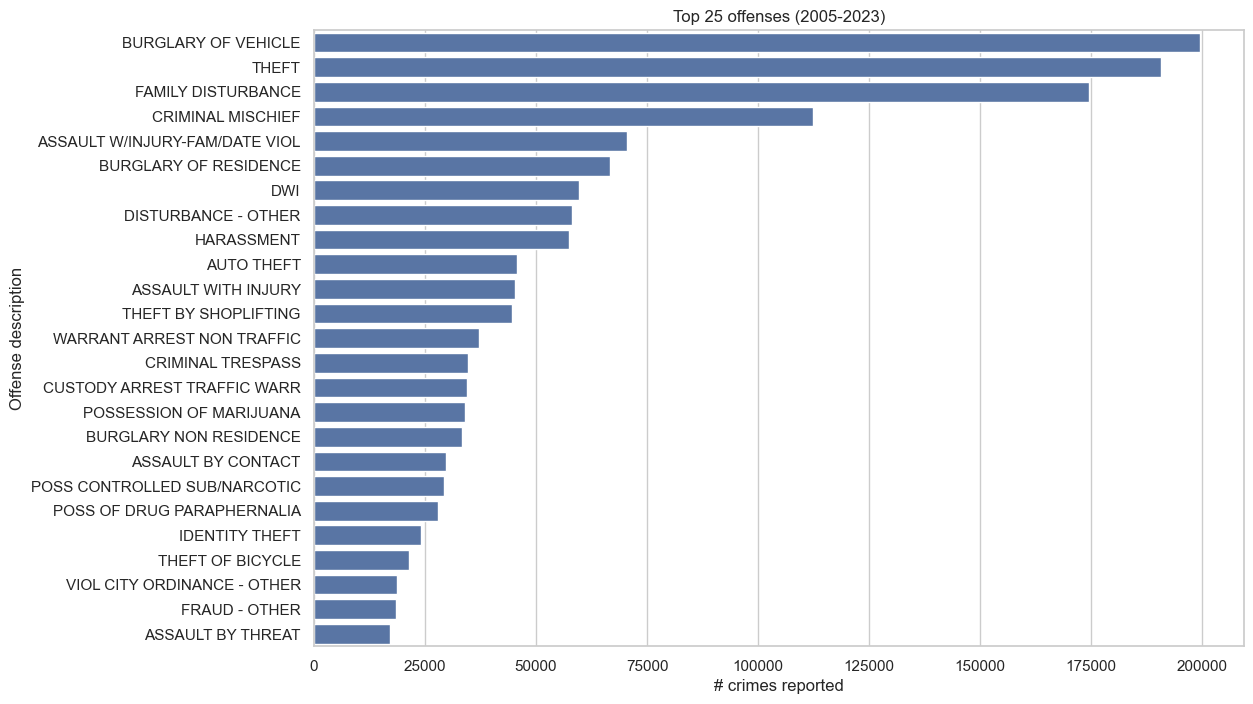

In [58]:
top_25_crimes = df_crime_reports['crime_type'].value_counts().head(25)
sns.set(rc={'figure.figsize':(12,8)},style="whitegrid")
g = sns.barplot(y=top_25_crimes.index, x=top_25_crimes.values,color='b')
g.set(xlabel='# crimes reported', ylabel='Offense description')
plt.title('Top 25 offenses (2005-2023)')
plt.show()

#### Burglary of vehicle is the top most offense!

### Common Crime Spots

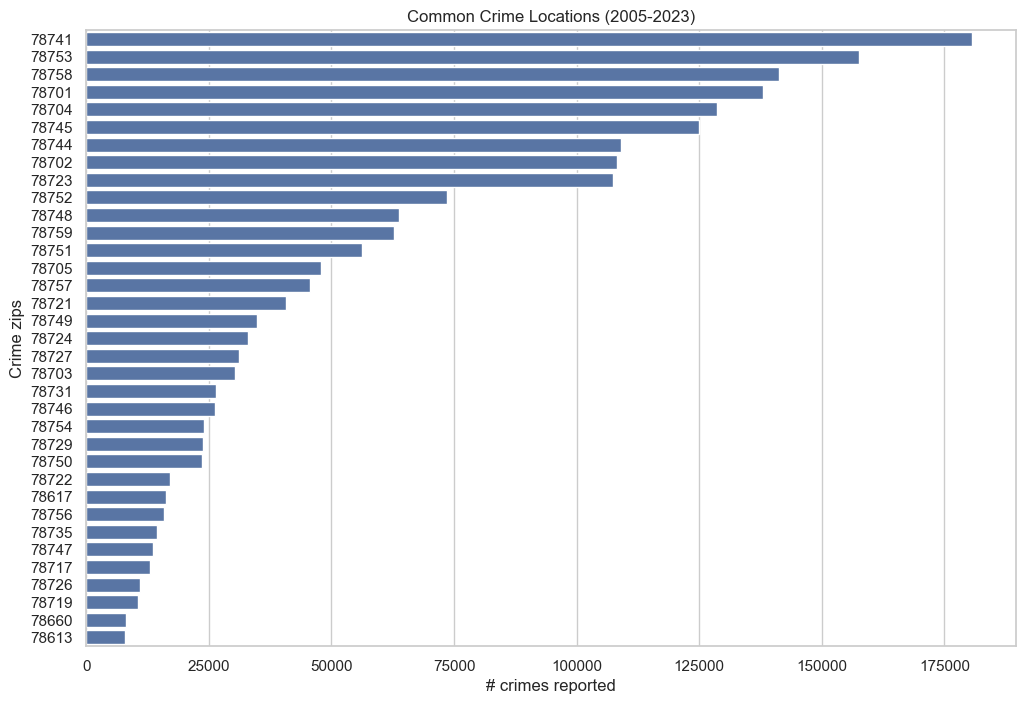

In [59]:
common_crime_spot = df_crime_reports['zip_code'].value_counts().head(35)
sns.set(rc={'figure.figsize':(12,8)},style="whitegrid")
g = sns.barplot(y=common_crime_spot.index, x=common_crime_spot.values,color='b')
g.set(xlabel='# crimes reported', ylabel='Crime zips')
plt.title('Common Crime Locations (2005-2023)')
plt.show()

### Visualize 78741 area on map

Define the Bounding Box

In [16]:
BBox = (df_crime_reports.longitude.min(),   df_crime_reports.longitude.max(),      
         df_crime_reports.latitude.min(), df_crime_reports.latitude.max())

In [32]:
austin_m = plt.imread('austin_78741_in_tableau.png')

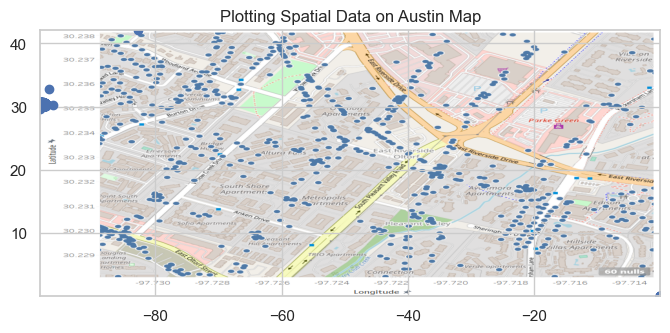

In [33]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_crime_reports.longitude, df_crime_reports.latitude)
ax.set_title('Plotting Spatial Data on Austin Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(austin_m, zorder=0, extent = BBox, aspect= 'equal')

In [60]:
df_crime_reports.dtypes

crime_type           object
location_type        object
address              object
zip_code             object
council_district    float64
sector               object
district             object
latitude            float64
longitude           float64
location             object
clearance_status     object
clearance_date       object
occurred_date        object
reported_date        object
month                object
year                  int64
hour                  int64
dtype: object

In [61]:
# need to convert datetime columns from object data type to date types
df_crime_reports['occurred_date'] = pd.to_datetime(df_crime_reports['occurred_date'],format='%Y-%m-%d')

In [62]:
# need to convert datetime columns from object data type to date types
df_crime_reports['reported_date'] = pd.to_datetime(df_crime_reports['reported_date'],format='%Y-%m-%d')

In [63]:
df_crime_reports.dtypes

crime_type                  object
location_type               object
address                     object
zip_code                    object
council_district           float64
sector                      object
district                    object
latitude                   float64
longitude                  float64
location                    object
clearance_status            object
clearance_date              object
occurred_date       datetime64[ns]
reported_date       datetime64[ns]
month                       object
year                         int64
hour                         int64
dtype: object

In [64]:
df_crime_reports.head()

,crime_type,location_type,address,zip_code,council_district,sector,district,latitude,longitude,location,clearance_status,clearance_date,occurred_date,reported_date,month,year,hour
0,ASSAULT BY CONTACT FAM/DATING,RESIDENCE / HOME,107 W CROSLIN ST,78752,4.0,ID,8,30.337487,-97.709976,"{'latitude': '30.33748689', 'longitude': '-97....",NaN,NaN,2023-02-18 23:55:00,2023-02-18 23:55:00,February,2023,23
1,POSS CONTROLLED SUB/NARCOTIC,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,5100 DUVAL ST,78751,9.0,ID,6,30.314296,-97.719965,"{'latitude': '30.3142963', 'longitude': '-97.7...",C,2023-02-19T00:00:00.000,2023-02-18 23:27:00,2023-02-18 23:27:00,February,2023,23
2,THEFT,RESIDENCE / HOME,4611 N IH 35 SVRD NB,78722,9.0,BA,4,30.304672,-97.712808,"{'latitude': '30.30467246', 'longitude': '-97....",NaN,NaN,2023-02-18 23:24:00,2023-02-18 23:24:00,February,2023,23
3,TERRORISTIC THREAT,PARKING /DROP LOT/ GARAGE,7622 N IH 35 SVRD SB,78752,4.0,ID,8,30.338908,-97.702001,"{'latitude': '30.33890768', 'longitude': '-97....",NaN,NaN,2023-02-18 23:04:00,2023-02-18 23:04:00,February,2023,23
4,DOC DISCHARGE GUN - PUB PLACE,RESIDENCE / HOME,6118 FAIRWAY ST,78741,3.0,HE,3,30.229004,-97.703101,"{'latitude': '30.2290038', 'longitude': '-97.7...",NaN,NaN,2023-02-18 23:03:00,2023-02-18 23:48:00,February,2023,23


In [65]:
df_crime_reports['day'] = df_crime_reports['occurred_date'].apply(lambda x: x.strftime('%d')) 

In [66]:
df_crime_reports.head()

,crime_type,location_type,address,zip_code,council_district,sector,district,latitude,longitude,location,clearance_status,clearance_date,occurred_date,reported_date,month,year,hour,day
0,ASSAULT BY CONTACT FAM/DATING,RESIDENCE / HOME,107 W CROSLIN ST,78752,4.0,ID,8,30.337487,-97.709976,"{'latitude': '30.33748689', 'longitude': '-97....",NaN,NaN,2023-02-18 23:55:00,2023-02-18 23:55:00,February,2023,23,18
1,POSS CONTROLLED SUB/NARCOTIC,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,5100 DUVAL ST,78751,9.0,ID,6,30.314296,-97.719965,"{'latitude': '30.3142963', 'longitude': '-97.7...",C,2023-02-19T00:00:00.000,2023-02-18 23:27:00,2023-02-18 23:27:00,February,2023,23,18
2,THEFT,RESIDENCE / HOME,4611 N IH 35 SVRD NB,78722,9.0,BA,4,30.304672,-97.712808,"{'latitude': '30.30467246', 'longitude': '-97....",NaN,NaN,2023-02-18 23:24:00,2023-02-18 23:24:00,February,2023,23,18
3,TERRORISTIC THREAT,PARKING /DROP LOT/ GARAGE,7622 N IH 35 SVRD SB,78752,4.0,ID,8,30.338908,-97.702001,"{'latitude': '30.33890768', 'longitude': '-97....",NaN,NaN,2023-02-18 23:04:00,2023-02-18 23:04:00,February,2023,23,18
4,DOC DISCHARGE GUN - PUB PLACE,RESIDENCE / HOME,6118 FAIRWAY ST,78741,3.0,HE,3,30.229004,-97.703101,"{'latitude': '30.2290038', 'longitude': '-97.7...",NaN,NaN,2023-02-18 23:03:00,2023-02-18 23:48:00,February,2023,23,18


### Hourly Crime distribution in 2022

In [ ]:
import plotly.express as px

In [67]:
df_2022 = df_crime_reports[df_crime_reports['year']==2022]

In [68]:
len(df_2022)

87294

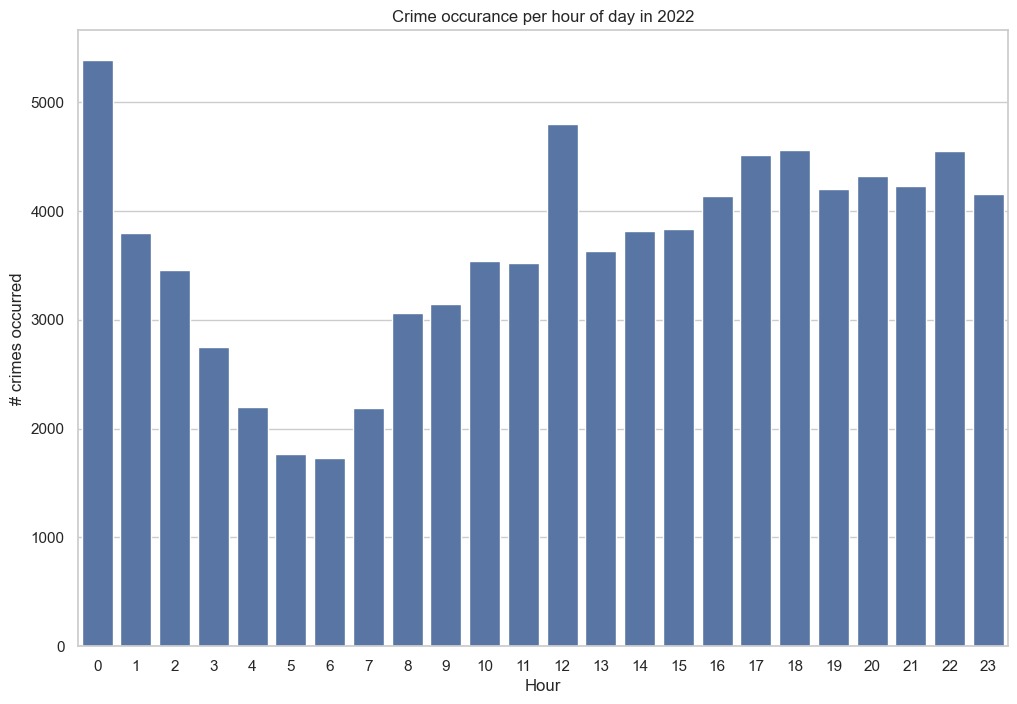

In [69]:
crimes_per_hour = df_2022['hour'].value_counts().sort_index()
g = sns.barplot(x=crimes_per_hour.index, y=crimes_per_hour.values, color='b')
g.set(xlabel='Hour', ylabel='# crimes occurred')
plt.title('Crime occurance per hour of day in 2022')
plt.show()

### Clearance Status

In [70]:
df_crime_reports['clearance_status'].value_counts()

N    1060400
C     457005
O      60913
Name: clearance_status, dtype: int64

In [71]:
df_crime_reports['district'].value_counts()

2        406460
1        394200
3        254501
4        235306
5        199675
7        184967
6        166868
8        132833
S          7490
88         5826
D          3660
B           767
A           394
9           389
C           250
10          242
P           228
0            64
D7            5
E8            1
F6            1
F7            1
A5            1
C7            1
A4            1
D8            1
04            1
OOC           1
I4            1
83            1
999           1
D4            1
ADM           1
ADAM3         1
A7            1
DAVID         1
A6            1
17            1
Name: district, dtype: int64

In [72]:
df_crime_reports['council_district'].value_counts()

3.0     315728
9.0     314754
4.0     295021
1.0     243054
2.0     196859
7.0     195435
5.0     153964
6.0      94587
10.0     84580
8.0      81217
Name: council_district, dtype: int64

In [73]:
df_crime_reports['sector'].value_counts()

ED       275153
DA       250719
FR       247948
CH       229997
HE       222345
ID       217491
BA       209944
AD       197693
GE       126378
AP        10100
88         5824
UT          974
AV           64
ADAM          8
A             4
CHAR          3
DAVID         3
4             3
H             3
2             2
RD            2
G             2
1             2
HENRY         2
8             2
FRK           1
99            1
F             1
E             1
F6            1
6             1
D             1
C             1
ADA<          1
B             1
HENR          1
83            1
A1            1
8805          1
HR            1
EDWD          1
C1            1
FRNK          1
DAVD          1
GRGE          1
1124          1
BAKR          1
IDA           1
I             1
CE            1
Name: sector, dtype: int64

In [75]:
missing = pd.concat([df_crime_reports.isnull().sum(), 100 * df_crime_reports.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values('count', ascending=False)

,count,%
clearance_status,421682,21.08410
clearance_date,254502,12.72510
location,33147,1.65735
latitude,33147,1.65735
longitude,33147,1.65735
council_district,24801,1.24005
location_type,10237,0.51185
zip_code,9769,0.48845
district,5856,0.29280
sector,5309,0.26545


In [76]:
# fill missing values of zip_code, latitude and longitude with mode
df_crime_reports['zip_code'].fillna(df_crime_reports['zip_code'].mode(), inplace = True)

In [77]:
df_crime_reports['latitude'].fillna(df_crime_reports['latitude'].mode(), inplace = True)
df_crime_reports['longitude'].fillna(df_crime_reports['longitude'].mode(), inplace = True)

In [78]:
df_crime_reports.isnull()

,crime_type,location_type,address,zip_code,council_district,sector,district,latitude,longitude,location,clearance_status,clearance_date,occurred_date,reported_date,month,year,hour,day
0,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1999996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1999997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1999998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [79]:
df_crime_reports['crime_type'].unique()

array(['ASSAULT BY CONTACT FAM/DATING', 'POSS CONTROLLED SUB/NARCOTIC',
       'THEFT', 'TERRORISTIC THREAT', 'DOC DISCHARGE GUN - PUB PLACE',
       'FAILURE TO REG AS SEX OFFENDER', 'DWI',
       'POSS CONTROLLED SUB/OTHER', 'DISTURBANCE - OTHER',
       'FAMILY DISTURBANCE', 'ASSAULT OF A PREGNANT WOMAN',
       'CRUELTY TO ANIMALS', 'BURGLARY NON RESIDENCE', 'DEADLY CONDUCT',
       'ASSAULT BY THREAT', 'DAMAGE CITY VEHICLE', 'AUTO THEFT',
       'EVADING / VEHICLE PURSUIT', 'ASSAULT W/INJURY-FAM/DATE VIOL',
       'AGG ROBBERY/DEADLY WEAPON', 'AGG ASSAULT', 'ASSAULT WITH INJURY',
       'CRIMINAL MISCHIEF', 'EVADING / FOOT', 'CRIMINAL TRESPASS',
       'TAMPERING WITH GOV RECORD', 'FAMILY DISTURBANCE/PARENTAL',
       'MURDER', 'ASSAULT BY CONTACT', 'DOC EXPOSURE',
       'THEFT CATALYTIC CONVERTER', 'CRASH/FAIL STOP AND RENDER AID',
       'THEFT BY SHOPLIFTING', 'HARASSMENT', 'BURGLARY OF VEHICLE',
       'CRIMINAL TRESPASS/TRANSIENT', 'INDECENCY WITH A CHILD/CONTACT',
       'F